# Exploratory Data Analysis
## Objectif:
#### comprendre des comportements de demande d'uber en analysant les demandes en fonction du temps

# Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from pandas.api.types import CategoricalDtype

os.getcwd()

'''
cd current directory
jupyter nbconvert "UberDataAnalysisProject.ipynb" --to pdf --no-input --TagRemovePreprocessor.remove_cell_tags='to_remove'
open UberDataAnalysisProject.pdf
'''

'\ncd current directory\njupyter nbconvert "UberDataAnalysisProject.ipynb" --to pdf --no-input --TagRemovePreprocessor.remove_cell_tags=\'to_remove\'\nopen UberDataAnalysisProject.pdf\n'

# Load dataset
#### dataset from April to September

In [2]:
files = glob.glob("../Downloads/Uber-dataset/*.csv")

list_df = []
for file in files:
    list_df.append(pd.read_csv(file))

data = pd.concat(list_df)

dataset = data.copy()

# Compréhension et preparation de dataset

In [3]:
dataset.shape

(4534327, 4)

In [4]:
dataset.head(3)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512


In [5]:
dataset.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [6]:
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 652434
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.0+ MB


In [8]:
dataset.describe()

,Lat,Lon
count,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01
std,3.994991e-02,5.726670e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


In [9]:
dataset.describe(include="datetime64")

<ipython-input-9-b7eaccfbe47f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset.describe(include="datetime64")


,Date/Time
count,4534327
unique,260093
top,2014-04-07 20:21:00
freq,97
first,2014-04-01 00:00:00
last,2014-09-30 22:59:00


In [10]:
dataset.describe(include="O")

,Base
count,4534327
unique,5
top,B02617
freq,1458853


In [11]:
dataset.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

##### Pas de valeurs manquante

In [12]:
# generate new variables based on 'Date/Time'
dataset['Year'] = dataset['Date/Time'].dt.year
dataset['Month'] = dataset['Date/Time'].dt.month_name()
dataset['Week'] = dataset['Date/Time'].dt.week
dataset['DayOfWeek'] = dataset['Date/Time'].dt.day_name()
dataset['Day'] = dataset['Date/Time'].dt.day
dataset['Hour'] = dataset['Date/Time'].dt.hour
dataset['Minute'] = dataset['Date/Time'].dt.minute
#dataset['Second'] = dataset['Date/Time'].dt.second

<ipython-input-12-e03671a0b5e0>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset['Week'] = dataset['Date/Time'].dt.week


In [13]:
dataset.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
Year                  int64
Month                object
Week                  int64
DayOfWeek            object
Day                   int64
Hour                  int64
Minute                int64
dtype: object

In [14]:
dataset.head()

,Date/Time,Lat,Lon,Base,Year,Month,Week,DayOfWeek,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,April,14,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,April,14,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,April,14,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,April,14,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,April,14,Tuesday,1,0,33


# Analyse dataset et dataviz

##  le nombre de trips en pourcentage par heure de la journée

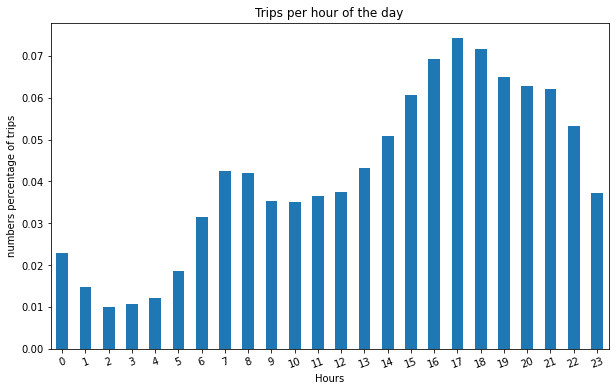

In [44]:
dataset["Hour"].value_counts(normalize=True).sort_index().plot.bar(figsize=(10, 6))
plt.xticks(dataset["Hour"].unique(), rotation=20)
plt.xlabel("Hours")
plt.ylabel("numbers percentage of trips")
_=plt.title("Trips per hour of the day")

##### On voit qu'il y a deux pic dans une journée, les heures de pointes matinale entre 6H-8H, et le deuxième entre 15H-21H, ça commence à reduire fortement vers 23h et une période creuse de 1H-5h du matin

## nombre de trip en pourcentage par jour du mois

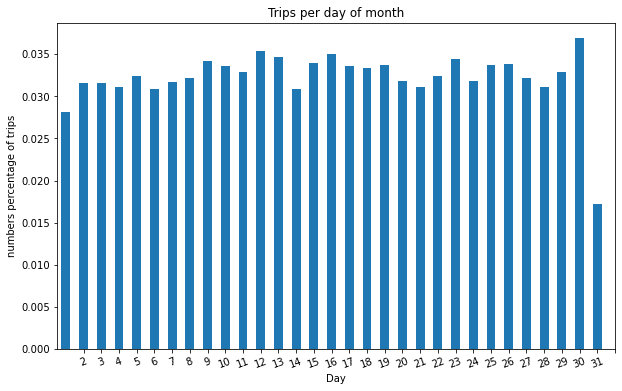

In [41]:
dataset["Day"].value_counts(normalize=True).sort_index().plot.bar(figsize=(10, 6))
plt.xticks(dataset["Day"].unique(), rotation=20)
plt.xlabel("Day")
plt.ylabel("numbers percentage of trips")
_=plt.title("Trips per day of month")

##### On voit que la demande est assez stable, un petit vers le milieu du mois et un pic plus import vers le 30 du mois, le 31 est très faible, car parmi ces 6 mois, il y a seulement 3 jours 31 

## par jour de la semaine

In [17]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories=cats, ordered=True)
dataset['DayOfWeek'] = dataset['DayOfWeek'].astype(cat_type)

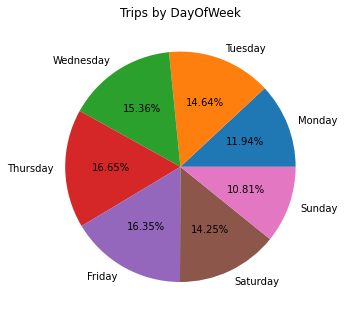

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(dataset["DayOfWeek"].value_counts(normalize=True).sort_index(), 
       labels = dataset["DayOfWeek"].unique().sort_values(),
      autopct='%1.2f%%')
plt.title("Trips by DayOfWeek")
plt.show()

##### On constate ici qu'il y a plus de demandes vers fin de semaine notemmant jeudi et vendredi

## semaine vs weekend

In [19]:
def week_weekend(DayOfWeek):
    if DayOfWeek in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return "week"
    else:
        return "week_end"
dataset['week_wk_end'] = dataset["DayOfWeek"].map(week_weekend)

In [20]:
dataset.head(2)

,Date/Time,Lat,Lon,Base,Year,Month,Week,DayOfWeek,Day,Hour,Minute,week_wk_end
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,April,14,Tuesday,1,0,11,week
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,April,14,Tuesday,1,0,17,week


<AxesSubplot:>

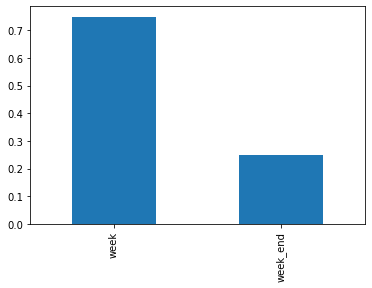

In [21]:
dataset.week_wk_end.value_counts(normalize=True).plot.bar()

##### 3/4 de demande en semaine et 1/4 seulement en weekend

## par mois 

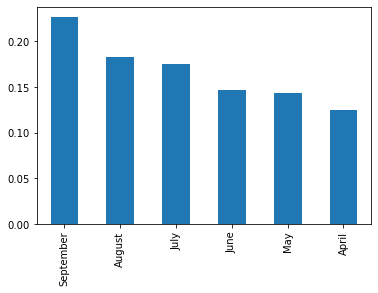

In [22]:
_=dataset.Month.value_counts(normalize=True).plot.bar()

##### Il y a plus de demande pendant la période des vacances d'été

## par heure en difféciant la semaine et le weekend

In [48]:
order_by_H_wk_end = dataset.groupby(["Hour", "week_wk_end"], 
                                    as_index=False).count()\
                                    .pivot("Hour", "week_wk_end", "Base")

<AxesSubplot:xlabel='Hour'>

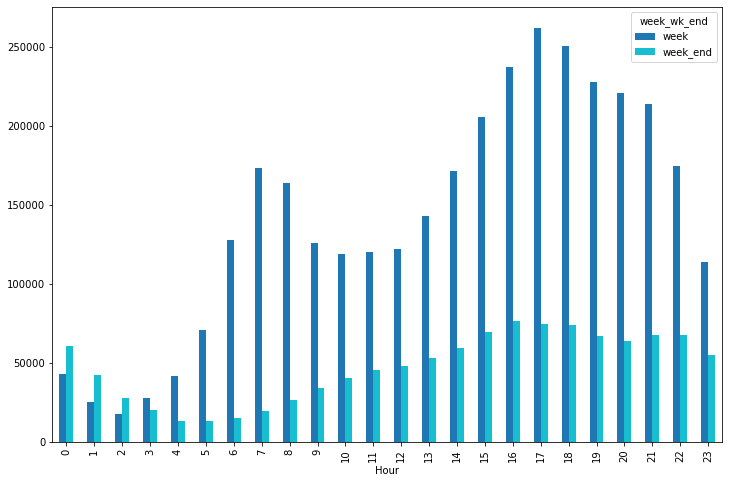

In [49]:
order_by_H_wk_end.plot.bar(cmap='tab10', figsize=(12,8))

##### On voit qu'en weekend la demande entre minuit et 2H est plus import qu'en semaine, ça doit dû au fait que les gens sortent et rentrent tard durant le weekend

## par heure par mois

In [25]:
hour_month = dataset.groupby(["Hour", "Month"], 
                                as_index=False).count()\
                                .pivot("Hour", "Month", "Base")
hour_month = hour_month[["April", "May", "June", "July", "August", "September"]]

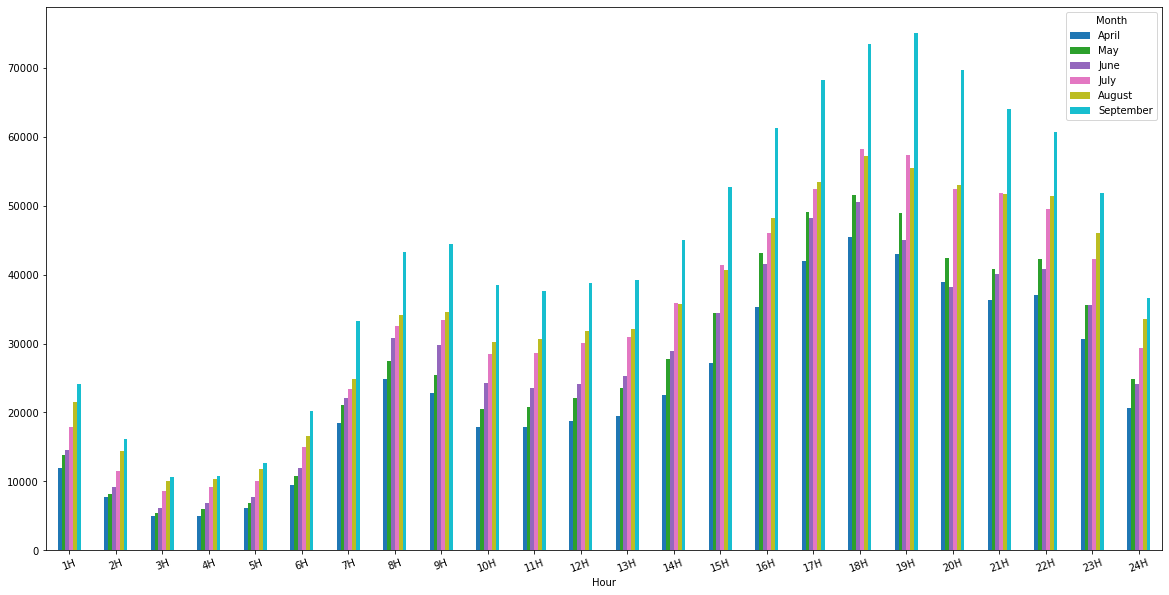

In [26]:
ax = hour_month.plot.bar(cmap='tab10', figsize=(20, 10)) # stacked=True,
ax.set_xticks([i for i in range(0, 24)])
_=ax.set_xticklabels([str(i) + str("H") for i in range(1, 25)], rotation=20)

##### beaucoup de demande en septembre peu import l'heure

## par jour de la semaine par mois

In [27]:
DayOfWeek_month = dataset.groupby(["DayOfWeek", "Month"], 
                                    as_index=False).count().\
                                    pivot("DayOfWeek", "Month", "Base")
DayOfWeek_month = DayOfWeek_month[["April", "May", "June", "July", "August", "September"]]

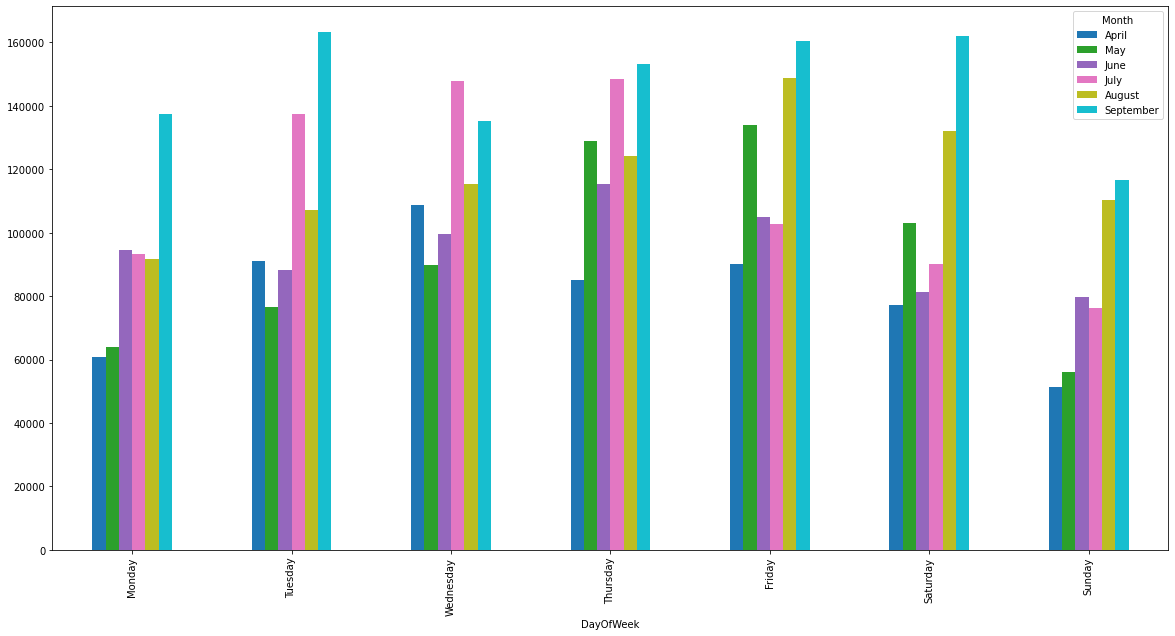

In [28]:
ax = DayOfWeek_month.plot.bar(cmap='tab10', figsize=(20, 10)) # stacked=True,

## par base

In [29]:
# The Base codes are for the following Uber bases:
BaseMapper= {'B02512' : 'Unter', 'B02598' : 'Hinter', 
             'B02617' : 'Weiter', 'B02682' : 'Schmecken',
             'B02764' : 'Danach-NY'}

dataset['Base'] = dataset['Base'].map(BaseMapper)

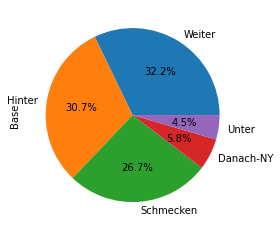

In [38]:
_=dataset.Base.value_counts().plot.pie(autopct='%1.1f%%',)

##### base  Weiter, Hinter, Schmecken représentent 32%, 30.7%, 26.7%

## par heure par base

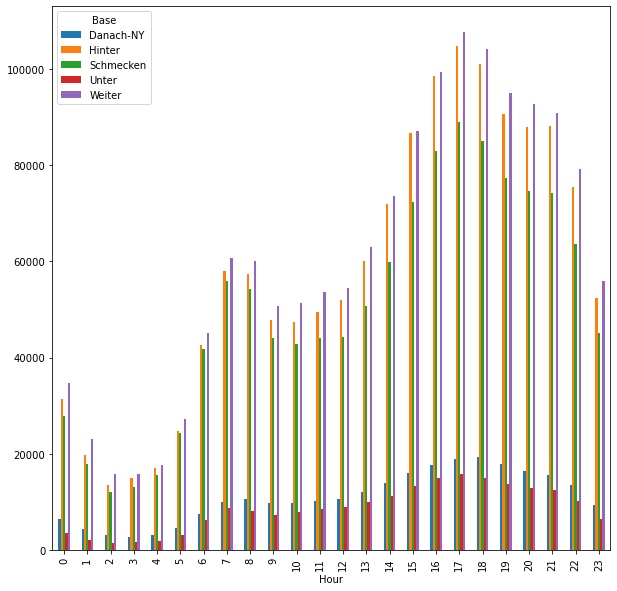

In [31]:
_=dataset.groupby(["Base", "Hour"], 
                as_index=False).count()\
                .pivot("Hour", "Base", "Year" )\
                .plot.bar(figsize=(10, 10))

## par base par heure

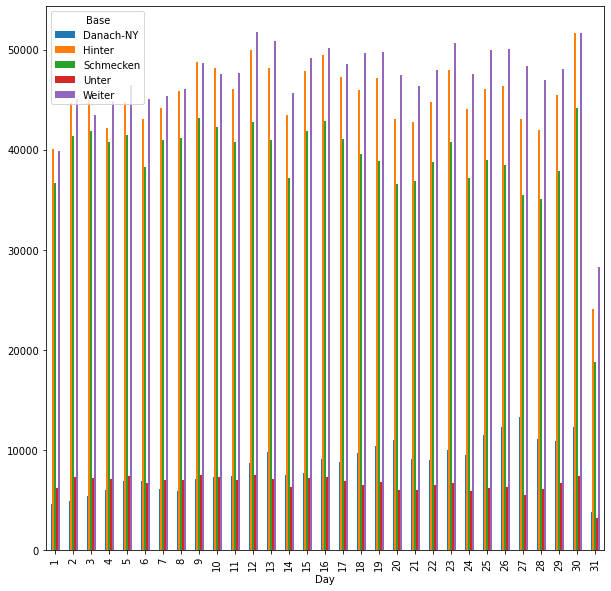

In [32]:
_=dataset.groupby(["Base", "Day"], 
                as_index=False).count()\
                .pivot("Day", "Base", "Year" )\
                .plot.bar(figsize=(10, 10))

# par jour de la semaine par base

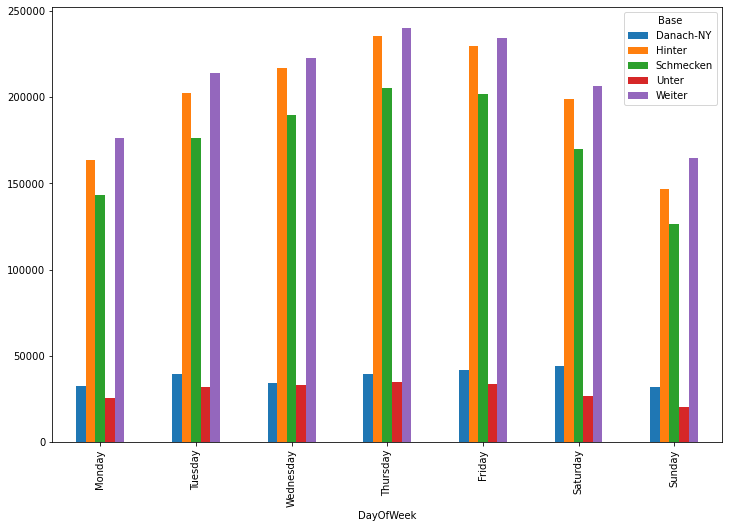

In [33]:
_=dataset.groupby(["Base", "DayOfWeek"], 
                as_index=False).count()\
                .pivot("DayOfWeek", "Base", "Year" )\
                .plot.bar(figsize=(12, 8))

## par semaine ou weekend par base

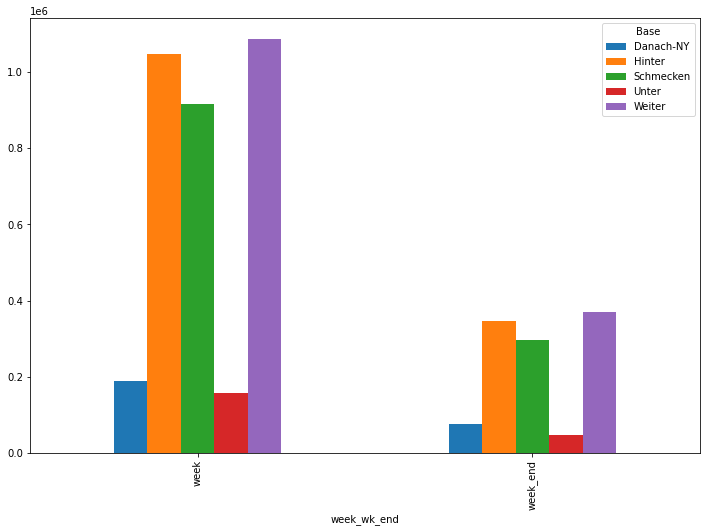

In [34]:
_=dataset.groupby(["Base", "week_wk_end"], 
                as_index=False).count()\
                .pivot("week_wk_end", "Base", "Year" )\
                .plot.bar(figsize=(12, 8))

# par mois par base 

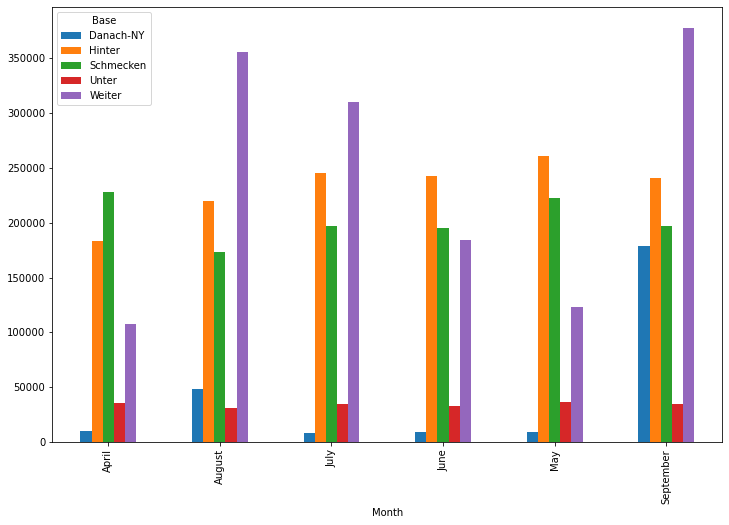

In [53]:
_=dataset.groupby(["Base", "Month"], 
                as_index=False).count()\
                .pivot("Month", "Base", "Year" )\
                .plot.bar(figsize=(12, 8))

##### Schmecken s'occupe une part la plus élevé en avril, Weiter en juille, août et septembre, Hinter en Mai et juin
